In [1]:
install.packages("viridis")
library("viridis")
install.packages("missMDA")
library("missMDA")
install.packages("factoextra")
library("factoextra")
install.packages("MASS")
library("MASS")
install.packages("ggplot2")
library("ggplot2")
install.packages("ggfortify")
library("ggfortify")

package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmp6dkKNW\downloaded_packages


Warning message:
"package 'viridis' was built under R version 4.0.5"
Loading required package: viridisLite



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmp6dkKNW\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 4.0.5"


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmp6dkKNW\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R\library\00LOCK\MASS\libs\x64\MASS.dll to D:\R\library\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmp6dkKNW\downloaded_packages


Warning message:
"package 'MASS' was built under R version 4.0.5"
Warning message:
"package 'ggplot2' is in use and will not be installed"


package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\Rtmp6dkKNW\downloaded_packages


Warning message:
"package 'ggfortify' was built under R version 4.0.5"


In [2]:
Species <- read.csv("geneva_Y_transformed_forPCA.csv",header = TRUE,colClasses =c(NA,"NULL",NA,"NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL","NULL","NULL",
                                                                                        "NULL","NULL","NULL","NULL") )

ionomics <- read.csv("geneva_Y_transformed_forPCA.csv",header = TRUE,colClasses =c("NULL","NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA) )
ionomics <- imputePCA(ionomics)

In [3]:
Species <- cbind(Species, ionomics)

In [4]:
ionsPCA <- prcomp(ionomics,scale = FALSE)
ionsPCAvar <- princomp(ionomics, cor = FALSE,score = TRUE)

In [5]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,2.99925539,34.3114696,34.31147
Dim.2,1.60232759,18.3306212,52.64209
Dim.3,0.81778891,9.3555019,61.99759
Dim.4,0.58176701,6.6554122,68.65300
Dim.5,0.49751653,5.6915871,74.34459
Dim.6,0.40886872,4.6774565,79.02205
Dim.7,0.31154167,3.5640354,82.58608
Dim.8,0.25418708,2.9078991,85.49398
Dim.9,0.23900198,2.7341817,88.22816


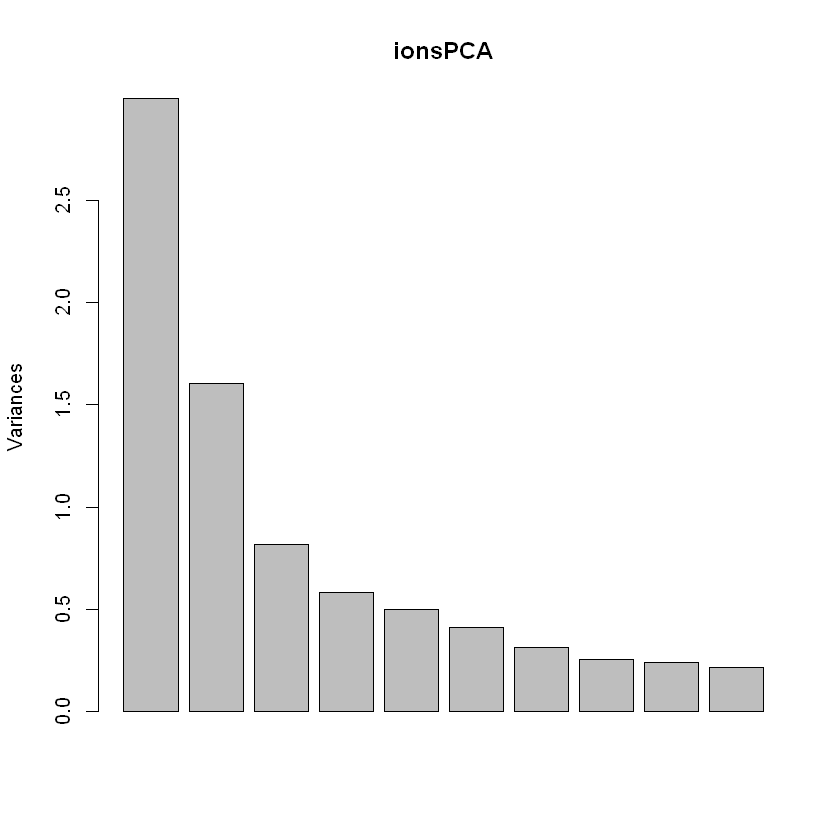

In [6]:
plot(ionsPCA)

In [7]:
summary(ionsPCAvar)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.7277271 1.2628276 0.90217134 0.76092695 0.70367509
Proportion of Variance 0.3431147 0.1833062 0.09355502 0.06655412 0.05691587
Cumulative Proportion  0.3431147 0.5264209 0.61997593 0.68653005 0.74344592
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     0.63791140 0.55683495 0.50297356 0.48771843 0.4607134
Proportion of Variance 0.04677456 0.03564035 0.02907899 0.02734182 0.0243978
Cumulative Proportion  0.79022049 0.82586084 0.85493983 0.88228165 0.9066795
                          Comp.11    Comp.12    Comp.13    Comp.14     Comp.15
Standard deviation     0.41463372 0.39540269 0.34786733 0.31547245 0.288632019
Proportion of Variance 0.01976143 0.01797084 0.01390965 0.01143963 0.009575866
Cumulative Proportion  0.92644088 0.94441171 0.95832137 0.96976099 0.979336860
                           Comp.16     Comp.17

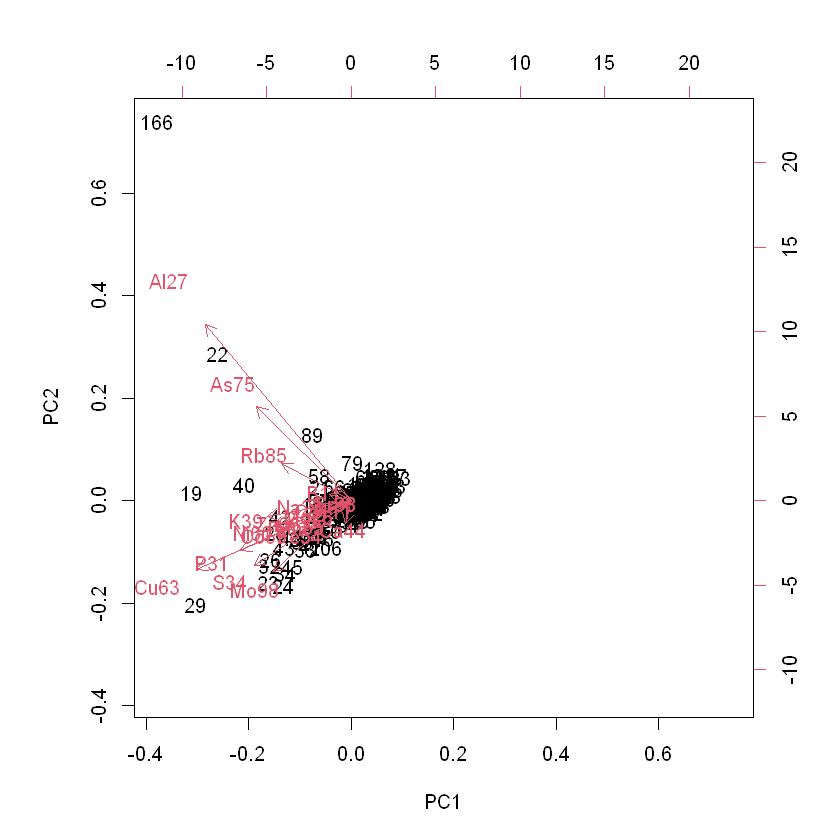

In [8]:
biplot(ionsPCA)

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

In [9]:
for (val in 1:nrow(Species)){
    if(Species[,2][val]==1){
        Species[,2][val]<-"V. acerifolia"
    }
    else if(Species[,2][val]==2){
        Species[,2][val]<-"V. aestivalis"
    }
    else if(Species[,2][val]==3){
        Species[,2][val]<-"V. cinerea"
    }
    else if(Species[,2][val]==4){
        Species[,2][val]<-"V. labrusca"
    }
    else if(Species[,2][val]==5){
        Species[,2][val]<-"V. palmata"
    }
    else if(Species[,2][val]==6){
        Species[,2][val]<-"V. riparia"
    }
    else if(Species[,2][val]==7){
        Species[,2][val]<-"V. rupestris"
    }    
    else if(Species[,2][val]==8){
        Species[,2][val]<-"V. vulpina"
    }
    else if(Species[,2][val]==0){
        Species[,2][val]<-"Hybrids and Unkowns"
    }
}

Saving 6.67 x 6.67 in image



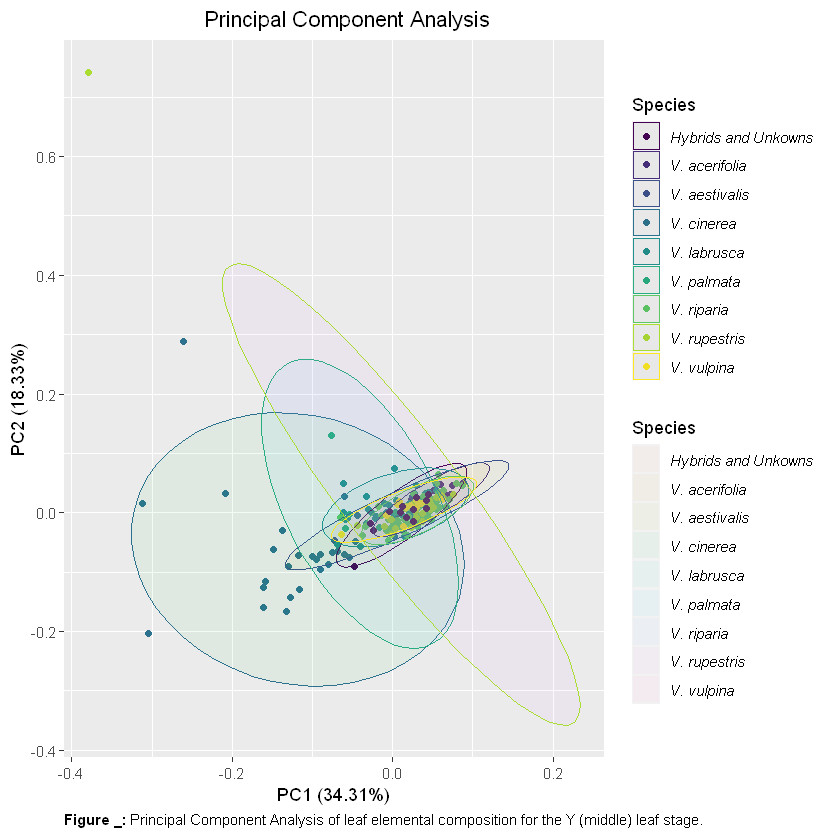

In [11]:
p <- autoplot(ionsPCA, data = Species, colour = 'spec_as_int', frame = TRUE, frame.type = 'norm', frame.alpha = .05) + scale_color_viridis_d("Species")
p <- p + labs(title = "Principal Component Analysis", caption = expression(paste(bold("Figure _: "),"Principal Component Analysis of leaf elemental composition for the Y (middle) leaf stage.")))
p <- p + theme(plot.title = element_text(hjust = .55), legend.text = element_text(face = "italic"), plot.caption = element_text(hjust = 0))
p <- p + scale_fill_discrete(name = "Species ")
p
ggsave(filename = "PCA_Y_only.jpg", dpi = "retina")

In [15]:
pcaVars <- get_pca_var(ionsPCA)
pcaVars$contrib[,1]
pcaVars$contrib[,2]

B11        Na23        Mg26        Al27         P31         S34 
 0.40479217  1.44675877  0.99470104 18.38601589 10.65454183  8.13682520 
        K39        Ca44        Fe54        Mn55        Co59        Ni60 
 6.12048044  0.03003077  1.43307619  1.42068196  4.18223491  5.31346647 
       Cu63        Zn66        As75        Rb85        Sr88        Mo98 
20.84879740  2.93378936  7.72407237  4.18114130  0.14466710  5.20948958 
      Cd111 
 0.43443727

B11         Na23         Mg26         Al27          P31          S34 
 0.067169113  0.037530191  0.311184801 50.175061214  4.023080525  6.802835612 
         K39         Ca44         Fe54         Mn55         Co59         Ni60 
 0.394617858  0.879217832  1.271161747  0.688531364  1.222801524  1.057589720 
        Cu63         Zn66         As75         Rb85         Sr88         Mo98 
 7.627575804  0.553404682 14.365999484  2.223163710  0.007306074  8.193831330 
       Cd111 
 0.097937416

In [16]:
cor()

ERROR: Error in is.data.frame(x): argument "x" is missing, with no default


In [17]:
cov(Species)

ERROR: Error in cov(Species): is.numeric(x) || is.logical(x) is not TRUE
